In [282]:
#Loads modules
import torch as t
import matplotlib.pyplot as plt

import os

import sys
dir_path = os.path.dirname(os.getcwd())
sys.path.append(os.path.join(dir_path,'scripts'))

import json

import importlib
import Systems as Systems
import Plotting as Plotting
import Training as Training
import Controls as Controls
import Evolvers as Evolvers

In [283]:
experiment = "Flensmon2D_8"

In [351]:
#Loads the params_dict for the experiment
exp_path = os.path.join(dir_path,"Experiments",experiment)

params_filepath = os.path.join(exp_path,"Parameters.json")
with open(params_filepath) as json_file:
    params_dict = json.load(json_file)

params_dict.update({"exp_path":exp_path})

I added a factor half to the cosines
Loaded UE0s


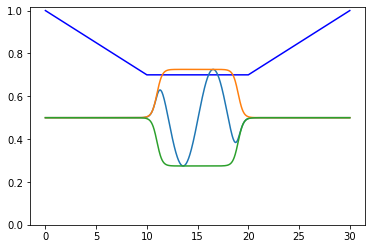

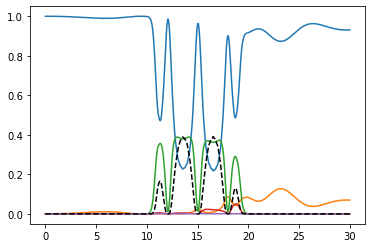

In [352]:
importlib.reload(Systems)
importlib.reload(Plotting)
importlib.reload(Training)
importlib.reload(Controls)
importlib.reload(Evolvers)

class Flensmon(t.nn.Module, Systems.Periodic_System, Controls.RampDownUpPulse, Evolvers.ETrotter, Training.Trainer, Plotting.Plotter):
    def __init__(self,params_dict):
        super().__init__()
        self.params_dict = params_dict
        # self.alphas = obj.activation_func(obj.times).detach()#obj.activation_func(None).detach()
        super(t.nn.Module,self).__init__()
        return
    
    def forward(self):
        H = self.get_H(self.activation_func(self.times),self.get_control())
        self.latest_matrix_exp = t.matrix_exp(-1j*H*self.dt)
        # self.latest_matrix_exp = self.basis_change@t.matrix_exp(-1j*H*self.dt)
        return t.linalg.multi_dot(list(mat for mat in self.latest_matrix_exp.flip(0)))

    def V_1d(self, alphas, control):
        return self.EJ*(-2*self.cos_mat.repeat((alphas.shape[0],1,1)) \
                            - alphas.view(-1,1,1)*self.cos2_mat \
                            + control.view(-1,1,1)*self.q_mat)
    
    def V_2d(self, alphas, control):
        return self.EJ*(-self.cos_mat.repeat((alphas.shape[0],1,1)) \
                            - alphas.view(-1,1,1)*self.cos2_mat \
                            + control.view(-1,1,1)*self.q_mat)

obj2 = Flensmon(params_dict)
# # obj.plot_potential()
obj2.plot_activation_func()
obj2.plot_occupancy(indices=[_ for _ in range(5)])
# obj2 = Flensmon(params_dict)

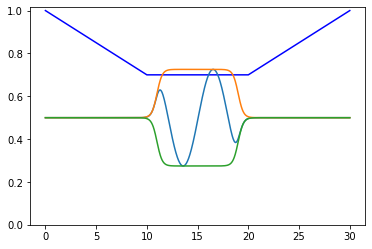

In [328]:
obj.plot_activation_func()

In [354]:
obj2.minimize(0.01,500)
# x = t.linspace(0,30,1000)
# plt.plot((x)*(x-30)/10000+1)
# plt.ylim(0,1)
# (x)*(x-30)/10000+1

initial loss: 0.8642538785934448
Ended at step: 553, with loss: 0.6163917779922485 and runtime: 463.54952001571655


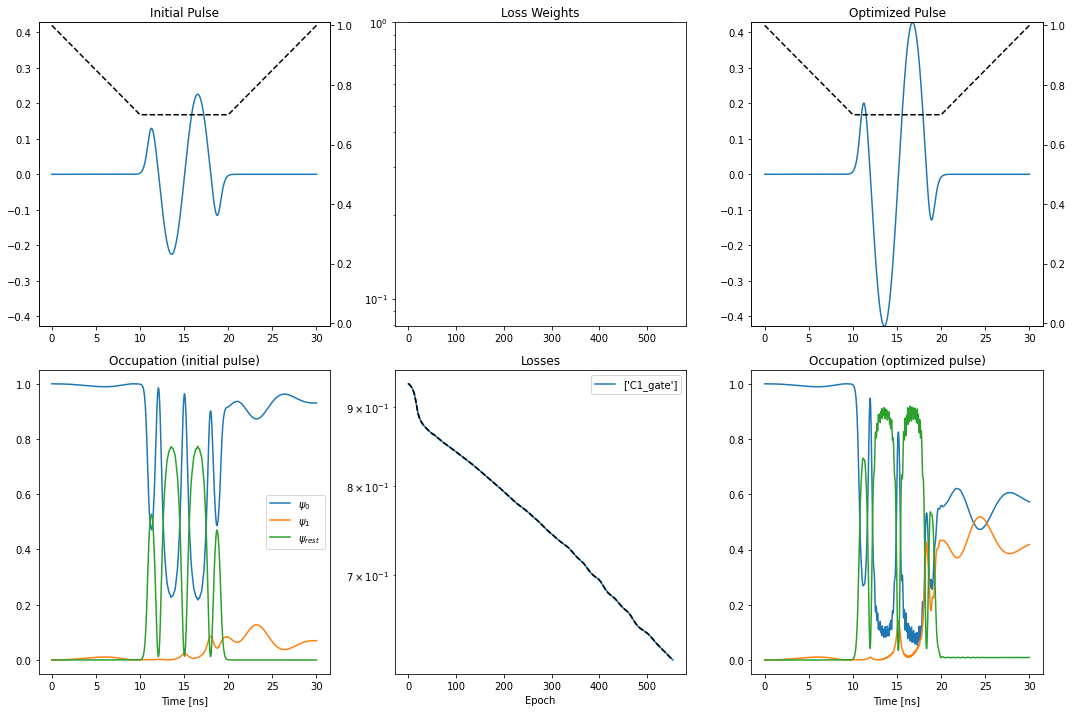

In [355]:
obj2.plot_run()

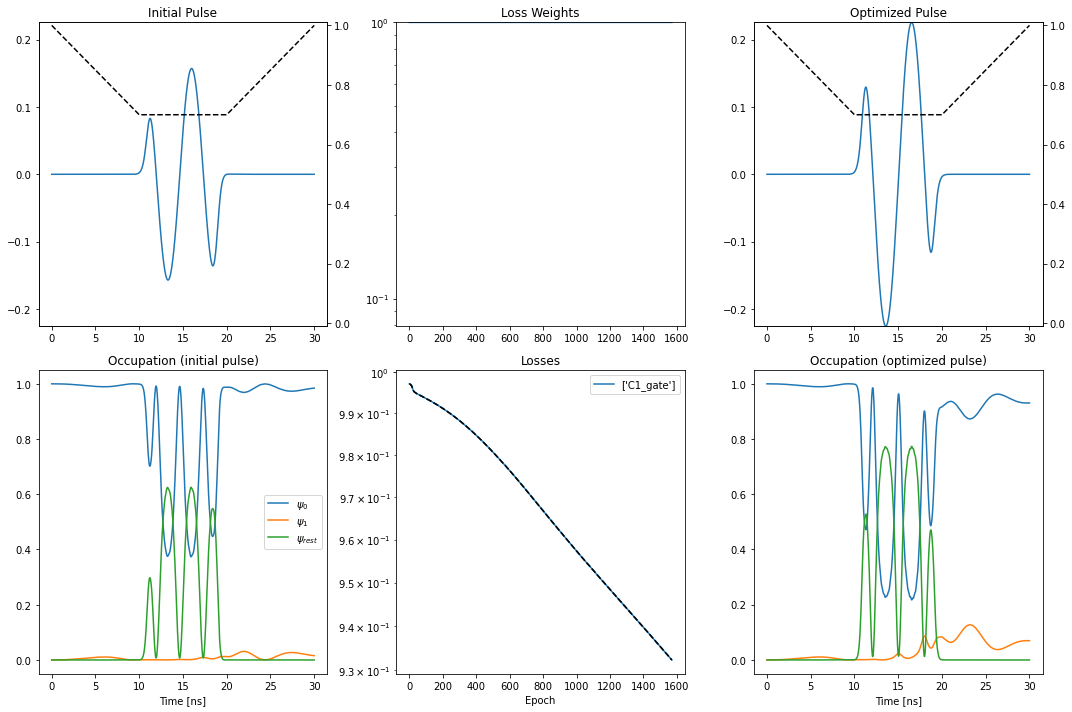

In [327]:
obj.plot_run()

tensor([0.9943])

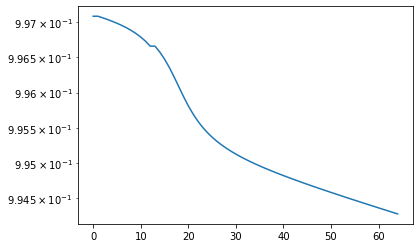

In [321]:
plt.plot(obj.stored_losses[:,:].T);
plt.yscale('log')
obj.stored_losses[:,-1]

In [208]:
def sim(self = obj2,alphas=obj2.alphas):
    M1 = t.matrix_exp(-1j*self.dt*(self.KinE-self.EJ*self.cos_mat))
    # Malpha = t.matrix_exp(-1j*self.dt*(-self.EJ*self.cos2_mat))
    Dcos2, Ucos2 = t.linalg.eigh(self.cos2_mat)
    MAs = Ucos2@t.diag_embed(t.exp(-1j*self.dt*(-self.EJ)*Dcos2*alphas.view(-1,1)))@Ucos2.adjoint()
    # Mpulse = t.matrix_exp(-1j*self.dt*(self.EJ*self.q_mat))
    # Dalpha, Ualpha = t.linalg.eigh(Malpha)
    # Dpulse, Upulse = t.linalg.eigh(Mpulse)
    # MAs = Ualpha@t.diag_embed(t.pow(Dalpha.cfloat(),self.alphas.view(-1,1)))@Ualpha.adjoint()
    # MPs = Upulse@t.diag_embed(t.pow(Dpulse,self.alphas.view(-1,1)))@Ualpha.adjoint()
    # self.latest_matrix_exp = M1@MAs
    return t.linalg.multi_dot(list(mat for mat in (M1@MAs).flip(0)))
    # occ = self.get_occupation
out = sim(alphas=obj.activation_func(obj.times))

In [209]:
(self.eigvecs[:,[0,1]].adjoint()@out@self.eigvecs[:,[0,1]]).abs().square()

tensor([[0.0950, 0.1877],
        [0.1307, 0.1244]], grad_fn=<PowBackward0>)

In [84]:
# plt.imshow(Ms[-1].abs())
# plt.colorbar()
out = t.linalg.multi_dot(list(mat for mat in Ms.flip(0)))

In [97]:
# out@obj2.eigvecs[:,[0,1]]
evo = t.eye(441).cfloat()
for i in range(275):
    if evo.isnan().any():
        break
    evo = Ms[i]@evo

In [118]:
(self.eigvecs[:,[0,1]].adjoint()@out@self.eigvecs[:,[0,1]]).abs()

tensor([[0.3589, 0.6204],
        [0.4609, 0.1966]])

In [270]:
obj.C4_gate(None)

tensor(1.9508e+28, grad_fn=<MeanBackward0>)

In [281]:
# t.save(new,os.path.join(obj.params_dict['exp_path'],"1110_AlphaRun.pt"))
# obj.basis_change.adjoint()@obj()@obj.basis_change
dim = 2
1 - 1/dim**2*t.square(t.abs(t.trace(obj.target_gate_adj[:dim]@obj()[:,:dim])))

tensor(0.9585, grad_fn=<RsubBackward1>)

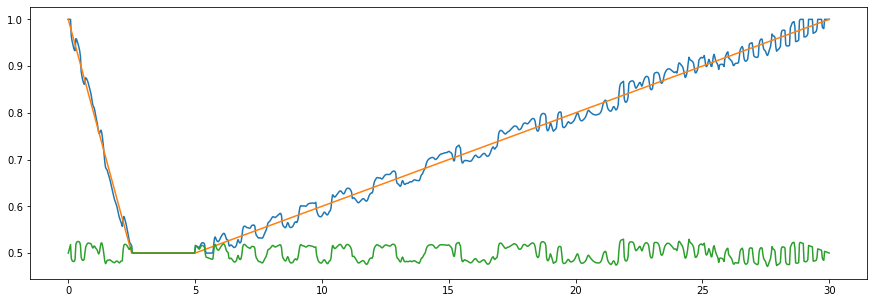

In [280]:
# obj.plot_activation_func()
plt.figure(figsize=(15,5))
new = obj.activation_func(obj.times).detach()
old = obj.init_activation_func(obj.times)
plt.plot(obj.times,new)
plt.plot(obj.times,old)
plt.plot(obj.times,new-old+0.5)

In [155]:
obj.activation_func(None).detach().min()

tensor(0.5000)

C:\Users\jv97\AppData\Local\Temp/ipykernel_22516/855404237.py:4: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  plt.plot(t.linspace(0,t.pi/obj.dt,obj.NTrot//2+1)[:mask.sum()//2+1],t.fft.rfft((new-old)[mask]).abs())


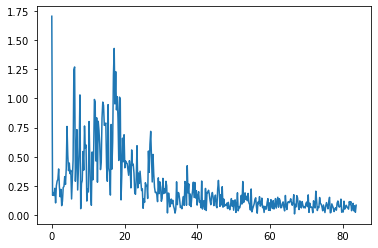

In [170]:
mask = (obj.times >6)
# mask = (obj.times < 20)&(obj.times>10)

plt.plot(t.linspace(0,t.pi/obj.dt,obj.NTrot//2+1)[:mask.sum()//2+1],t.fft.rfft((new-old)[mask]).abs())
# plt.xlim(0,150)

In [156]:
t.abs(new[:500] - new[500:].flip(0)).max().item()

0.39948827028274536

In [212]:
occ = obj2.get_occupancy([_ for _ in range(19)],[0,1]).detach()
# occ2 = obj2.get_occupancy([_ for _ in range(19)],[0,1]).detach()
# occ22 = obj5.get_occupancy([_ for _ in range(19)],[0,1]).detach()

In [213]:
occ_labels = [r"$\psi_"+str(i)+r"$" if i in [0,1,2,4,5] else None for i in range(19)]
occ_labels[0] + "\n"+r"$|\psi_0|^2 = $"+str(occ[0,-1,0].item())[:7]

'$\\psi_0$\n$|\\psi_0|^2 = $0.23458'

Text(0.5, 1.0, '$|\\langle \\psi_n(t) |\\mathcal{U}(t)| \\psi_1(0)\\rangle|^2$')

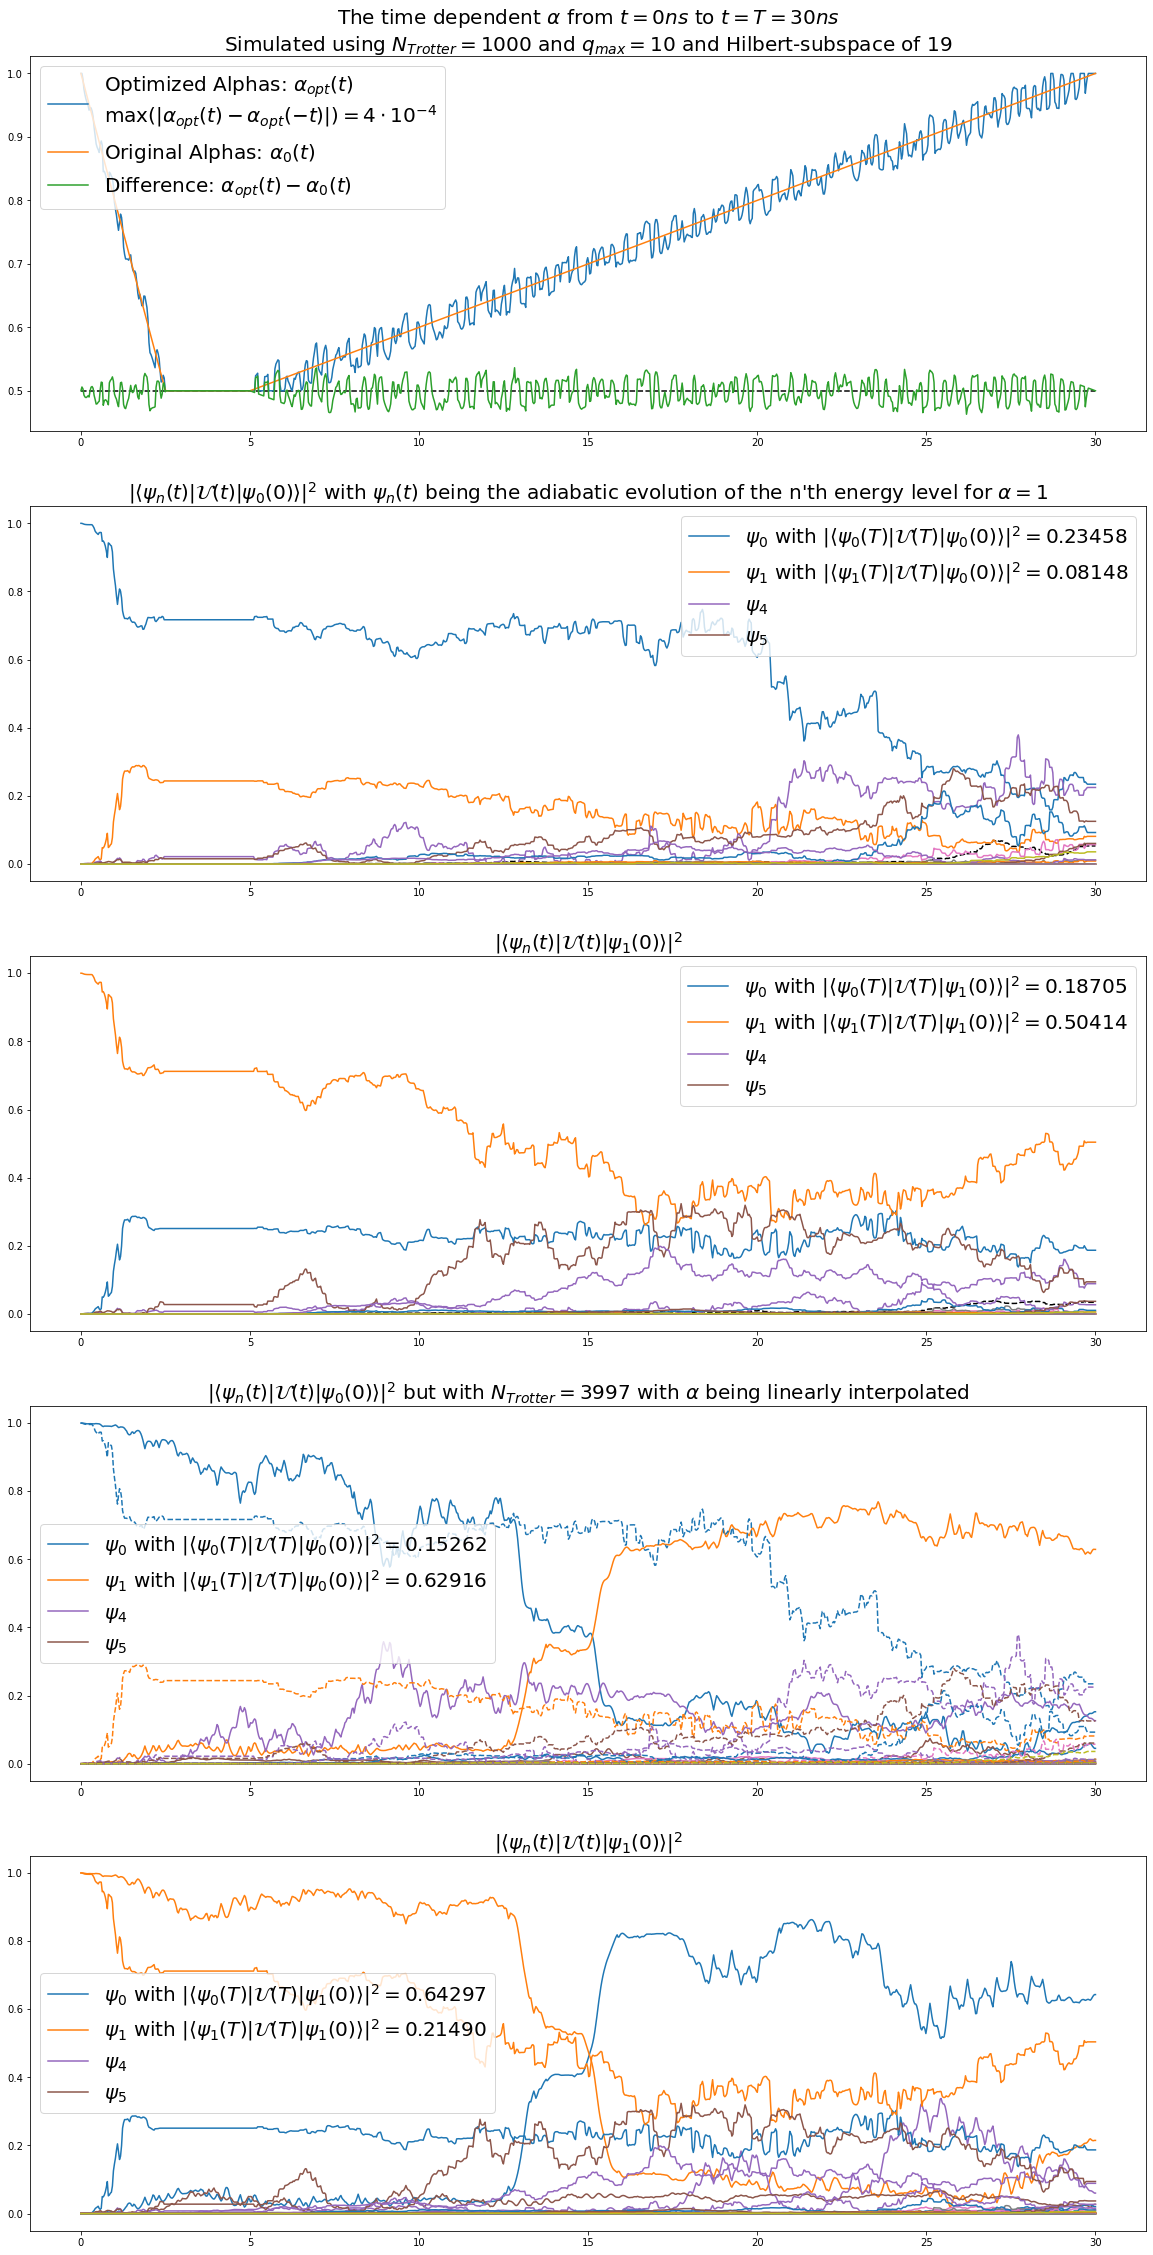

In [214]:
fontsize=20

fig, ax = plt.subplots(figsize=(20,40),nrows=5)

new = obj.activation_func(obj.times).detach()
old = obj.init_activation_func(obj.times)
ax[0].plot(obj.times,new,label=r'Optimized Alphas: $\alpha_{opt}(t)$'+'\n'+r'max$(|\alpha_{opt}(t) - \alpha_{opt}(-t)|) = 4\cdot 10^{-4}$')
# ax[0].plot(obj2.times,obj2.alphas,linestyle='--')
ax[0].plot(obj.times,old,label=r'Original Alphas: $\alpha_0(t)$')
ax[0].plot(obj.times,new-old+0.5,label=r'Difference: $\alpha_{opt}(t) - \alpha_0(t)$')
ax[0].hlines(0.5,0,30,linestyle='--',color='k',zorder=-1)
ax[0].legend(fontsize=fontsize)
ax[0].set_title(r"The time dependent $\alpha$ from $t=0ns$ to $t=T=30ns$" +"\n" + r"Simulated using $N_{Trotter} = 1000$ and $q_{max}=10$ and Hilbert-subspace of 19",fontsize=fontsize)

# ax[1].plot(obj.times[:500],new[:500])
# ax[1].plot(obj.times[:500],new[500:].flip(0))
# ax[1].plot(obj.times[:500],t.abs(new[:500] - new[500:].flip(0)))
# ax[1].set_yscale('log')

occ_labels = [r"$\psi_"+str(i)+r"$" if i in [0,1,4,5] else None for i in range(19)]
occ_labels[0] += " with "+r"$|\langle \psi_0(T) |\mathcal{U}(T)| \psi_0(0)\rangle|^2 = $"+str(occ[0,-1,0].item())[:7]
occ_labels[1] += " with "+r"$|\langle \psi_1(T) |\mathcal{U}(T)| \psi_0(0)\rangle|^2 = $"+str(occ[1,-1,0].item())[:7]

ax[1].plot(obj.times,occ[:-1,:,0].T,label=occ_labels)
ax[1].plot(obj.times,occ[-1,:,0],'k--',zorder=-1)
ax[1].legend(fontsize=fontsize)
ax[1].set_title(r"$|\langle \psi_n(t) |\mathcal{U}(t)| \psi_0(0)\rangle|^2$ with $\psi_n(t)$ being the adiabatic evolution of the n'th energy level for $\alpha=1$",fontsize=fontsize)
# ax[1].hlines(1,0,30,zorder=-1,linestyle='--',color='k')
# ax[1].set_ylim(1e-4,1.1)
# ax[1].set_yscale('log')

occ_labels = [r"$\psi_"+str(i)+r"$" if i in [0,1,4,5] else None for i in range(19)]
occ_labels[0] += " with "+r"$|\langle \psi_0(T) |\mathcal{U}(T)| \psi_1(0)\rangle|^2 = $"+str(occ[0,-1,1].item())[:7]
occ_labels[1] += " with "+r"$|\langle \psi_1(T) |\mathcal{U}(T)| \psi_1(0)\rangle|^2 = $"+str(occ[1,-1,1].item())[:7]

ax[2].plot(obj.times,occ[:-1,:,1].T,label=occ_labels)
ax[2].plot(obj.times,occ[-1,:,1],'k--',zorder=-1)
ax[2].legend(fontsize=fontsize)
ax[2].set_title(r"$|\langle \psi_n(t) |\mathcal{U}(t)| \psi_1(0)\rangle|^2$",fontsize=fontsize)

occ_labels = [r"$\psi_"+str(i)+r"$" if i in [0,1,4,5] else None for i in range(19)]
occ_labels[0] += " with "+r"$|\langle \psi_0(T) |\mathcal{U}(T)| \psi_0(0)\rangle|^2 = $"+str(occ2[0,-1,0].item())[:7]
occ_labels[1] += " with "+r"$|\langle \psi_1(T) |\mathcal{U}(T)| \psi_0(0)\rangle|^2 = $"+str(occ2[1,-1,0].item())[:7]

ax[3].plot(obj2.times,occ2[:-1,:,0].T,label=occ_labels)
ax[3].set_prop_cycle(None)
ax[3].plot(obj.times,occ[:-1,:,0].T,linestyle='--')
# ax[3].plot(obj4.times,occ11[:-1,:,0].T,linestyle='--')
ax[3].plot(obj2.times,occ2[-1,:,0],'k--',zorder=-1)
ax[3].legend(fontsize=fontsize)
ax[3].set_title(r"$|\langle \psi_n(t) |\mathcal{U}(t)| \psi_0(0)\rangle|^2$ but with $N_{Trotter}=3997$ with $\alpha$ being linearly interpolated",fontsize=fontsize)

occ_labels = [r"$\psi_"+str(i)+r"$" if i in [0,1,4,5] else None for i in range(19)]
occ_labels[0] += " with "+r"$|\langle \psi_0(T) |\mathcal{U}(T)| \psi_1(0)\rangle|^2 = $"+str(occ2[0,-1,1].item())[:7]
occ_labels[1] += " with "+r"$|\langle \psi_1(T) |\mathcal{U}(T)| \psi_1(0)\rangle|^2 = $"+str(occ2[1,-1,1].item())[:7]

ax[4].plot(obj2.times,occ2[:-1,:,1].T,label=occ_labels)
ax[4].set_prop_cycle(None)
ax[4].plot(obj.times,occ[:-1,:,1].T,linestyle='-')
# ax[4].plot(obj3.times,occ6[:-1,:,1].T,linestyle='--')
# ax[4].plot(obj3.times,occ9[:-1,:,1].T,linestyle='--')
ax[4].plot(obj2.times,occ2[-1,:,1],'k--',zorder=-1)
ax[4].legend(fontsize=fontsize)
ax[4].set_title(r"$|\langle \psi_n(t) |\mathcal{U}(t)| \psi_1(0)\rangle|^2$",fontsize=fontsize)

In [48]:
obj.stored_losses

tensor([[9.7257e-01, 9.7257e-01, 9.7120e-01,  ..., 1.3245e-01, 1.3231e-01,
         1.3214e-01],
        [5.4280e-05, 5.4280e-05, 5.2481e-05,  ..., 5.6233e-03, 5.6255e-03,
         5.6276e-03]])

In [1085]:
from tqdm import tqdm
alphas = obj2.alphas
control = t.zeros(obj2.NTrot)
bitesize = 100
bites = t.arange(0,obj2.NTrot+bitesize,bitesize)
evo = t.eye(obj2.NHilbert**2).cfloat()
for i in tqdm(range(bites.shape[0]-1)):
    H = obj2.KinE + obj2.V(alphas=alphas[bites[i]:bites[i+1]],control=control[bites[i]:bites[i+1]])
    exp_mat = t.matrix_exp(-1j*H*obj2.dt)
    evo = t.linalg.multi_dot(list(mat for mat in exp_mat.flip(0)))@evo

100%|██████████| 40/40 [08:05<00:00, 12.13s/it]


In [128]:
from tqdm import tqdm
alphas = obj.activation_func(None).detach()
control = t.zeros(obj.NTrot)
bitesize = 100
bites = t.arange(0,obj.NTrot+bitesize,bitesize)
evo2 = t.eye(obj2.NHilbert**2).cfloat()
for i in tqdm(range(bites.shape[0]-1)):
    H = obj2.KinE + obj2.V(alphas=alphas[bites[i]:bites[i+1]],control=control[bites[i]:bites[i+1]])
    exp_mat = t.matrix_exp(-1j*H*obj.dt)
    evo2 = t.linalg.multi_dot(list(mat for mat in exp_mat.flip(0)))@evo2

100%|██████████| 10/10 [03:46<00:00, 22.64s/it]


In [130]:
tmp2 = obj2.eigvecs.adjoint()@evo2@obj2.eigvecs[:,:2]
tmp2.abs().square()[:2].sqrt()

tensor([[0.4023, 0.7940],
        [0.7853, 0.4687]])

In [1297]:
tmp = obj2.eigvecs.adjoint()@evo@obj2.eigvecs[:,:2]
tmp.abs().square()[:2]

tensor([[4.6473e-04, 9.9488e-01],
        [9.9482e-01, 4.3067e-04]])

tensor(0.0003)

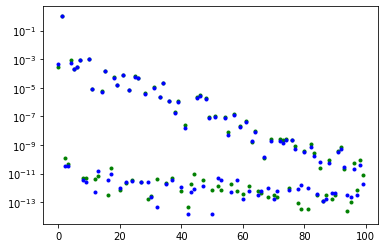

In [1299]:
plt.plot(tmp.abs().square()[:100,0],'b.')
plt.plot(tmp2.abs().square()[:100,0],'g.',zorder=-1)
plt.yscale('log')
tmp.abs().square()[19:,0].sum()

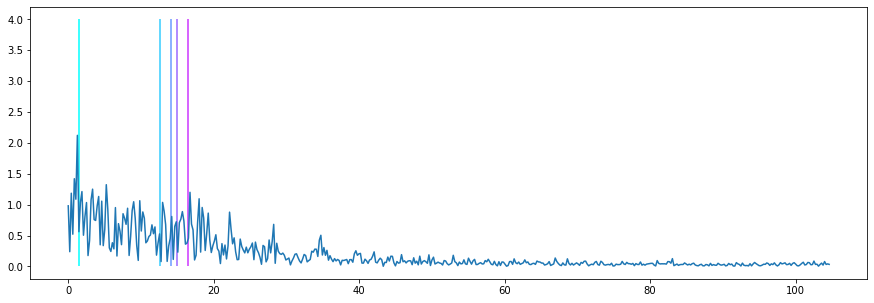

In [155]:
pulse = obj.get_control().detach().clone()
eigvals = obj.H0_term[500].real.diagonal()
energies = [eigvals[3]-eigvals[2],
            eigvals[2]-eigvals[1],
            eigvals[3]-eigvals[1],
            eigvals[2]-eigvals[0],
            eigvals[3]-eigvals[0]]


fft = t.fft.rfft(pulse)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(t.linspace(0,t.pi/obj.dt,obj.NTrot//2+1),fft.abs())
# ax.set_xlim(-1,20)
for i,E in enumerate(energies):
    ax.vlines(E,0,4,colors=(i/len(energies),1-i/len(energies),1))